In [1]:
pip install pandas numpy matplotlib seaborn


In [2]:
import pandas as pd

df = pd.read_csv('COVID clinical trials.csv')  # Replace with the correct file path


In [5]:
print(df.head())         # First 5 rows
print(df.info())         # Column info and types
print(df.describe())     # Summary for numerical
print(df.describe(include='object'))  # Summary for categorical


   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [7]:
missing_data = df.isnull().mean() * 100
print(missing_data)


Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [17]:
print(df.columns.tolist())


['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Last Update Posted', 'Locations', 'URL', 'Country']


In [19]:
for col in ['Study Documents', 'Results First Posted']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [21]:
df.drop_duplicates(inplace=True)


In [23]:
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1] if pd.notnull(x) else 'Missing Country')


<Axes: title={'center': 'Trial Status Distribution'}, xlabel='Status'>

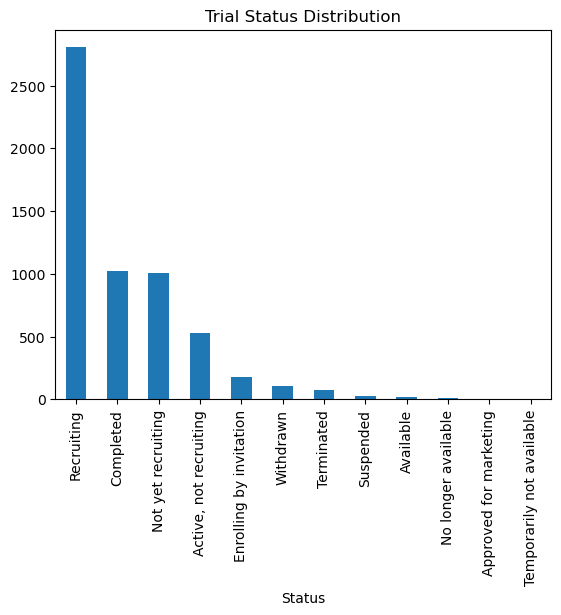

In [25]:
df['Status'].value_counts().plot(kind='bar', title='Trial Status Distribution')


<Axes: title={'center': 'Trial Phases'}, xlabel='Phases'>

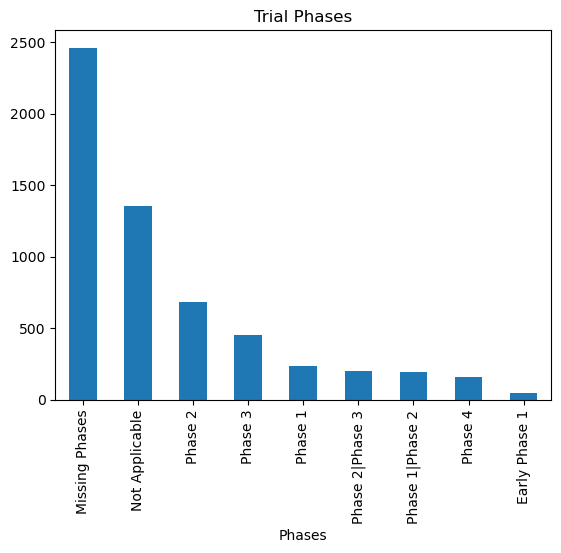

In [27]:
df['Phases'].value_counts().plot(kind='bar', title='Trial Phases')


<Axes: title={'center': 'Age Distribution'}, xlabel='Age'>

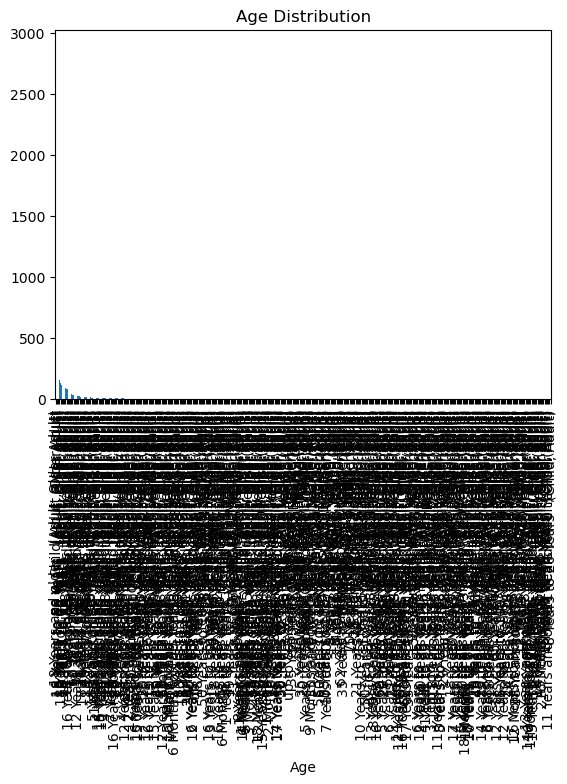

In [29]:
df['Age'].value_counts().plot(kind='bar', title='Age Distribution')


<Axes: title={'center': 'Top 10 Countries by Trial Count'}, xlabel='Country'>

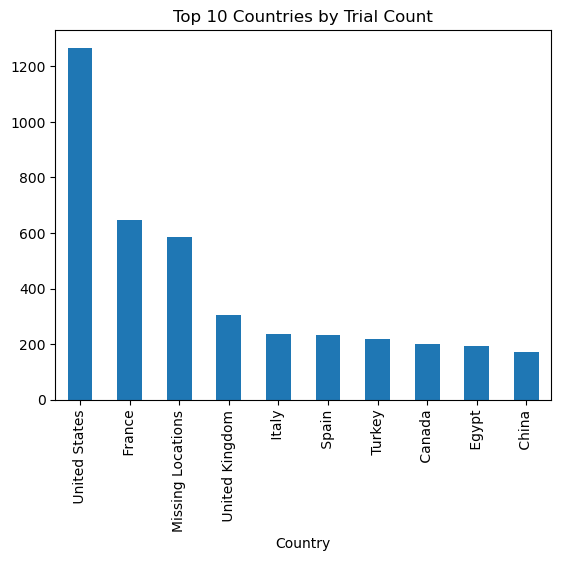

In [30]:
df['Country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Trial Count')


<Axes: title={'center': 'Status vs Phases'}, xlabel='Status'>

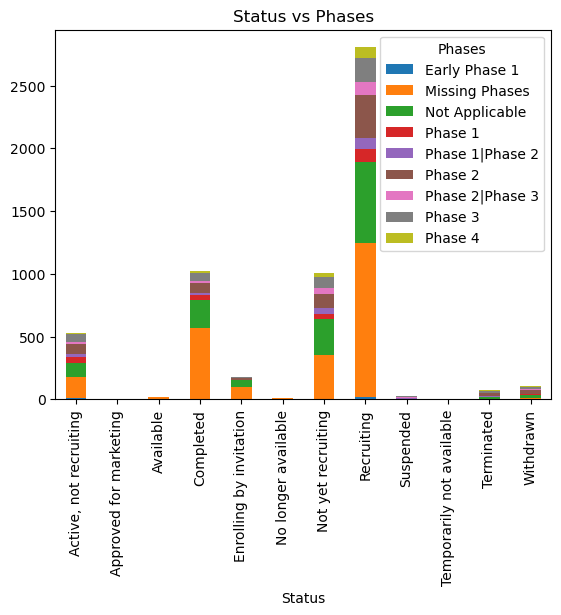

In [33]:
pd.crosstab(df['Status'], df['Phases']).plot(kind='bar', stacked=True, title='Status vs Phases')


In [35]:
grouped = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x)).reset_index()
print(grouped.head())


                                          Conditions  \
0                             2019 Novel Coronavirus   
1                   2019 Novel Coronavirus Infection   
2  2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                   2019 Novel Coronavirus Pneumonia   
4          2019 Novel Coronavirus Pneumonia|COVID-19   

                                    Outcome Measures  
0  Proportion of participants who improve by at l...  
1  new-onset COVID-19|Number of Participants with...  
2  Number of participants with treatment emergent...  
3  Clinical recovery time|Complete fever time|Cou...  
4  Pneumonia severity index|Oxygenation index (Pa...  


In [37]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')


<Axes: title={'center': 'Trial Start Over Time'}, xlabel='Start Date'>

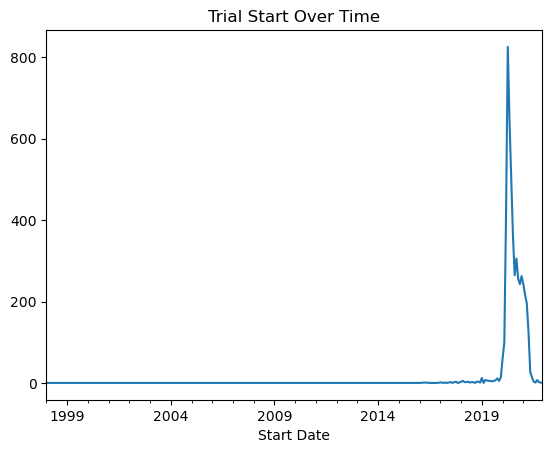

In [39]:
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Trial Start Over Time')


In [46]:
df.to_csv('cleaned_covid_trials.csv', index=False)
